# Data Science Cycle

## 1. Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('201_adult/adult.data')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 2. Data Cleaning
In den nominalen Daten sind no ch unb ekannte Werte gekennzeichnet
durch '?' vorhanden. Bereinigen Sie die Daten, indem Sie alle Zeilen
entfernen, die unb ekannte Werte enthalten.

In [4]:
# Ersetzen von '?' durch 'NaN'
df = df.replace(' ?', np.nan)
# Entfernen von Zeilen mit 'NaN'
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              30161 non-null  int64 
 1    State-gov      30161 non-null  object
 2    77516          30161 non-null  int64 
 3    Bachelors      30161 non-null  object
 4    13             30161 non-null  int64 
 5    Never-married  30161 non-null  object
 6    Adm-clerical   30161 non-null  object
 7    Not-in-family  30161 non-null  object
 8    White          30161 non-null  object
 9    Male           30161 non-null  object
 10   2174           30161 non-null  int64 
 11   0              30161 non-null  int64 
 12   40             30161 non-null  int64 
 13   United-States  30161 non-null  object
 14   <=50K          30161 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.columns = [
    'Age', 
    'Workclass', 
    'Fnlwgt', 
    'Education', 
    'Education-Num', 
    'Marital-Status', 
    'Occupation', 
    'Relationship', 
    'Race', 
    'Sex', 
    'Capital-Gain', 
    'Capital-Loss', 
    'Hours-per-week', 
    'Native-Country', 
    'Income'
]
df.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
y = df.copy()


for index, value in enumerate(y['Income']):
    if value == ' <=50K':
       y.loc[index, 'Income'] = 0
    else:
        y.loc[index, 'Income'] = 1

y


,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Income
0,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
1,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
2,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
3,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0
4,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
30104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
30109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
30155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
percentage = df['Income'].value_counts(normalize=True)[' >50K'] * 100
percentage

24.89307383707437

<span style="color:red">Was ist die Genauigkeit eines naiven Klassifikation-Mo dells, welches unabhängig von den tatsächlichen Features immer weniger als 50.000$ Einkommen zuweist? Dies ist das Mindestmaß an Genauigkeit, an dem sich ihre späteren Modelle messen müssen.</span>

Die Genauigkeit eines naiven Klassifikationsmodells, das unabhängig von den tatsächlichen Merkmalen immer ein Einkommen von weniger als 50.000$ zuweist, wäre gleich dem Prozentsatz der Personen in den Daten, die tatsächlich ein Einkommen von weniger als 50.000$ haben.

Du kannst dies berechnen, indem du die Anzahl der Personen mit einem Einkommen von weniger als 50.000$ durch die Gesamtzahl der Personen teilen.

Hier ist ein Beispiel, wie du das tun können:

In [8]:
accuracy = df['Income'].value_counts(normalize=True)[' <=50K']
accuracy

0.7510692616292564

## 3. Data Visualization

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Fnlwgt', ylabel='Age'>,
        <Axes: xlabel='Education-Num', ylabel='Age'>,
        <Axes: xlabel='Capital-Gain', ylabel='Age'>,
        <Axes: xlabel='Capital-Loss', ylabel='Age'>,
        <Axes: xlabel='Hours-per-week', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Fnlwgt'>,
        <Axes: xlabel='Fnlwgt', ylabel='Fnlwgt'>,
        <Axes: xlabel='Education-Num', ylabel='Fnlwgt'>,
        <Axes: xlabel='Capital-Gain', ylabel='Fnlwgt'>,
        <Axes: xlabel='Capital-Loss', ylabel='Fnlwgt'>,
        <Axes: xlabel='Hours-per-week', ylabel='Fnlwgt'>],
       [<Axes: xlabel='Age', ylabel='Education-Num'>,
        <Axes: xlabel='Fnlwgt', ylabel='Education-Num'>,
        <Axes: xlabel='Education-Num', ylabel='Education-Num'>,
        <Axes: xlabel='Capital-Gain', ylabel='Education-Num'>,
        <Axes: xlabel='Capital-Loss', ylabel='Education-Num'>,
        <Axes: xlabel='Hours-per-week', ylabel='Education-Num'>],
 

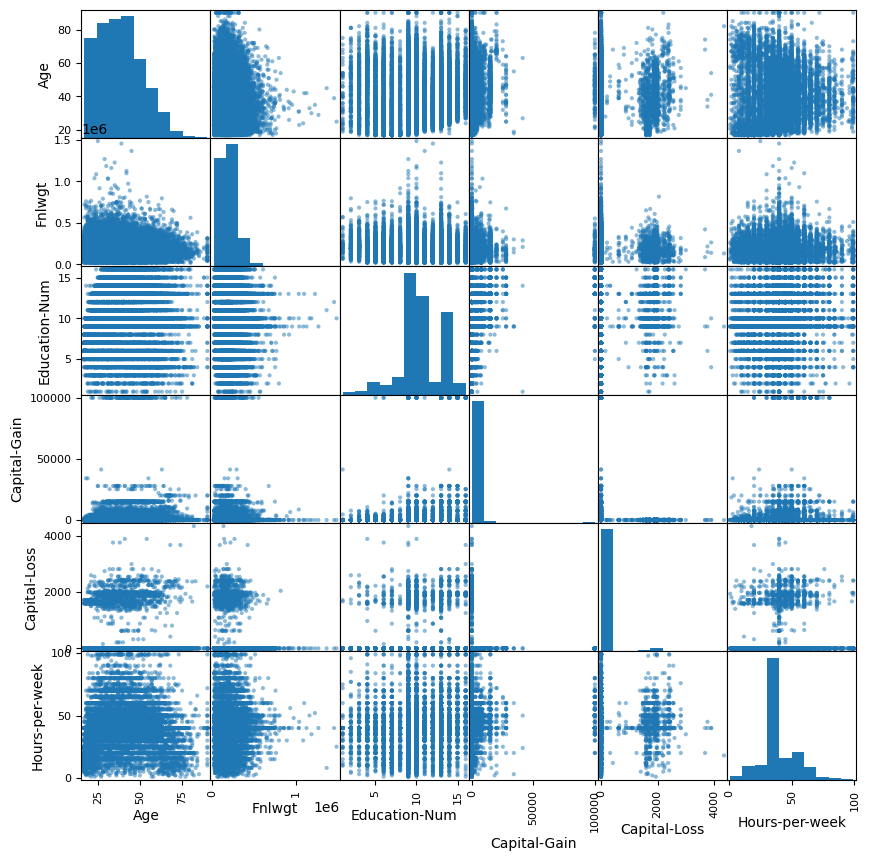

In [9]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(y, figsize=(10,10))

## 4. Data Transformation

<span style="color:red">
Warum werden verzerrten Features wie capital gain und capital loss durch log(x+1) normiert?</span>

Die Log-Transformation wie log(x+1) für Merkmale mit ungleichmäßiger Verteilung, wie Kapitalgewinne und -verluste, wird aus einigen einfachen Gründen verwendet:

1. **Gleichmäßigere Verteilung:** Viele Daten, besonders Geldbeträge, häufen sich bei niedrigen Werten mit einigen wenigen hohen Ausreißern. Die Log-Transformation zieht diese Ausreißer näher an die anderen Werte heran, sodass die Daten weniger schief verteilt sind und gleichmäßiger aussehen.

2. **Nullwerte handhaben:** Direkt kann man den Logarithmus von Null nicht nehmen, weil das nicht definiert ist. Indem man aber zu jedem Wert 1 addiert, bevor man den Logarithmus nimmt, kann man auch Nullwerte einbeziehen, weil log(1) = 0 ist.

3. **Leichtere Interpretation:** Nach der Transformation kann man Änderungen in den Daten einfacher verstehen, da sie in einer Art prozentualen Veränderung ausgedrückt werden.

4. **Stabilere Varianz:** Die Transformation hilft auch dabei, die Varianz der Daten über verschiedene Werte hinweg gleichmäßiger zu machen. Das bedeutet, dass die Streuung der Daten nicht mehr so stark mit der Größe der Werte schwankt.

Zusammengefasst macht die Log-Transformation Daten mit ungleichmäßiger Verteilung einfacher zu handhaben, sowohl für die Analyse als auch für maschinelles Lernen.

<span style="color:red">Warum werden numerische Features auf den Wertebereich [0;1] normiert?</span>

Die Normierung von Daten auf einen Bereich von [0, 1] macht Folgendes:

Stellt sicher, dass alle Daten gleich wichtig sind, damit kein Merkmal das Lernen dominiert.
Hilft dem Lernalgorithmus schneller, gute Ergebnisse zu finden.
Verhindert Probleme durch sehr große oder sehr kleine Zahlen.
Passt die Daten an, wie sie manche Algorithmen brauchen.
Einfach gesagt, es macht das Training von Maschinenlernen-Modellen schneller, einfacher und oft besser.

<span style="color:red">Was ist one-hot-encoding ist und warum es benutzt wird um nominale Daten zu normieren.</span>

One-Hot-Encoding ist eine Methode, um Kategorien in Zahlen umzuwandeln, sodass Computer damit arbeiten können. Stell dir vor, du hast ein Spielzeug, das rot, blau oder grün sein kann. Mit One-Hot-Encoding gibst du jeder Farbe ihre eigene "Spalte" und markierst die zutreffende Farbe mit einer 1, während die anderen 0 bleiben.

Rot könnte [1, 0, 0] sein,

Blau wäre [0, 1, 0],

Grün würde [0, 0, 1] entsprechen.

Wir nutzen One-Hot-Encoding, weil Computer mit Zahlen und nicht mit Wörtern wie "rot" oder "blau" rechnen. Es hilft dem Computer, die Unterschiede zwischen den Kategorien klar zu erkennen, ohne sie zu vermischen oder falsch zu interpretieren.

<span style="color:red">Was ist die get_dummies Methode von Pandas in dem Kontext?</span>

In dem Kontext von One-Hot-Encoding ist die `get_dummies` Methode von Pandas ein sehr praktisches Werkzeug, das automatisch kategoriale Daten (wie Farben, Ländernamen, Produktkategorien) in ein Format umwandelt, das von Maschinenlernalgorithmen verarbeitet werden kann. Für jede Kategorie in einer Spalte erstellt `get_dummies` eine neue Spalte (oder "Dummy"-Variable), die mit 1 oder 0 markiert ist, je nachdem, ob die Kategorie in der Zeile vorhanden ist oder nicht.

Zum Beispiel, wenn du eine Spalte mit Tierarten wie "Hund", "Katze" und "Vogel" hast, würde `get_dummies` daraus drei neue Spalten machen: eine für "Hund", eine für "Katze" und eine für "Vogel". Für jede Zeile, in der zum Beispiel "Hund" steht, würde in der "Hund"-Spalte eine 1 und in den Spalten für "Katze" und "Vogel" jeweils eine 0 stehen.

Das macht `get_dummies` zu einem einfachen und schnellen Weg, um kategoriale Daten so umzuwandeln, dass sie von den meisten maschinellen Lernmodellen genutzt werden können, ohne manuell jede Kategorie in eine eigene Spalte umwandeln zu müssen.

In [15]:
from sklearn.preprocessing import MinMaxScaler

def transform(X):
    # Kopieren von den Eingabe-DataFrame
    transformed_df = X.copy()
    
    # Logarithmieren  von 'capital_gain' und 'capital_loss' Spalten
    transformed_df['Capital-Gain'] = np.log1p(transformed_df['Capital-Gain'])
    transformed_df['Capital-Loss'] = np.log1p(transformed_df['Capital-Loss'])
    
    # Normalisieren  der numerischen Spalten auf den Bereich [0, 1]
    scaler = MinMaxScaler()
    num_cols = ['Age', 'Education-Num', 'Capital-Gain', 'Capital-Loss', 'Hours-per-week']
    transformed_df[num_cols] = scaler.fit_transform(transformed_df[num_cols])
    
    #One-Hot-Encoding für die nominalen Spalten durch
    transformed_df = pd.get_dummies(transformed_df)
    
    return transformed_df

In [16]:
from sklearn.model_selection import train_test_split

# Transformieren Sie die Features
X_transformed = transform(y)

# Teilen Sie den Datensatz in einen Trainings- und Testdatensatz
X_train, X_test = train_test_split(X_transformed, test_size=0.2, random_state=0)

X_transformed

,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-Country_ Taiwan,Native-Country_ Thailand,Native-Country_ Trinadad&Tobago,Native-Country_ United-States,Native-Country_ Vietnam,Native-Country_ Yugoslavia,Income_0,Income_1,Income_ <=50K,Income_ >50K
0,0.452055,83311.0,0.800000,0.0,0.0,0.122449,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,0.287671,215646.0,0.533333,0.0,0.0,0.397959,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0.493151,234721.0,0.400000,0.0,0.0,0.397959,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
3,0.150685,338409.0,0.800000,0.0,0.0,0.397959,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0.273973,284582.0,0.866667,0.0,0.0,0.397959,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30101,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
30104,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
30109,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
30155,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [18]:


# Beispiel-Datenframe erstellen (ersetzen Sie dies durch Ihren eigenen DataFrame)
data = {
    'Age': [39, 50, 38, 53], 
    'Fnlwgt': [77516, 83311, 215646, 234721], 
    'Education-Num': [13, 13, 9, 7], 
    'Capital-Gain': [2174, 0, 0, 0], 
    'Capital-Loss': [0, 0, 0, 0], 
    'Hours-per-week': [40, 13, 40, 45]
}
df = pd.DataFrame(data)

# Log-Transformation auf spezifische Spalten anwenden
columns_to_transform = ['Age', 'Fnlwgt', 'Education-Num', 'Capital-Gain', 'Capital-Loss', 'Hours-per-week']
df_log_transformed = df.copy()  # Kopie des DataFrame erstellen, um die Originaldaten beizubehalten

for column in columns_to_transform:
    df_log_transformed[column] = np.log1p(df_log_transformed[column])

# Log-transformierte Daten anzeigen
print(df_log_transformed)

        Age     Fnlwgt  Education-Num  Capital-Gain  Capital-Loss  \
0  3.688879  11.258253       2.639057      7.684784           0.0   
1  3.931826  11.330348       2.639057      0.000000           0.0   
2  3.663562  12.281398       2.302585      0.000000           0.0   
3  3.988984  12.366157       2.079442      0.000000           0.0   

   Hours-per-week  
0        3.713572  
1        2.639057  
2        3.713572  
3        3.828641  


In [19]:


# Beispiel-Datenframe erstellen (ersetzen Sie dies durch Ihren eigenen DataFrame)
data = {
    'Age': [39, 50, 38, 53], 
    'Fnlwgt': [77516, 83311, 215646, 234721], 
    'Education-Num': [13, 13, 9, 7], 
    'Capital-Gain': [2174, 0, 0, 0], 
    'Capital-Loss': [0, 0, 0, 0], 
    'Hours-per-week': [40, 13, 40, 45]
}
df = pd.DataFrame(data)

# Log-Transformation anwenden
df_log_transformed = df.copy()

for column in df_log_transformed.select_dtypes(include=['int64', 'float64']).columns:
    df_log_transformed[column] = np.log1p(df_log_transformed[column])

# Min-Max-Skalierung anwenden
df_normalized = df_log_transformed.copy()

for column in df_normalized.select_dtypes(include=['int64', 'float64']).columns:
    min_value = df_normalized[column].min()
    max_value = df_normalized[column].max()
    df_normalized[column] = (df_normalized[column] - min_value) / (max_value - min_value)

# Normalisierte und log-transformierte Daten anzeigen
print(df_normalized)

        Age    Fnlwgt  Education-Num  Capital-Gain  Capital-Loss  \
0  0.077800  0.000000       1.000000           1.0           NaN   
1  0.824356  0.065074       1.000000           0.0           NaN   
2  0.000000  0.923496       0.398744           0.0           NaN   
3  1.000000  1.000000       0.000000           0.0           NaN   

   Hours-per-week  
0        0.903269  
1        0.000000  
2        0.903269  
3        1.000000  
